# Principal Component Analysis

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

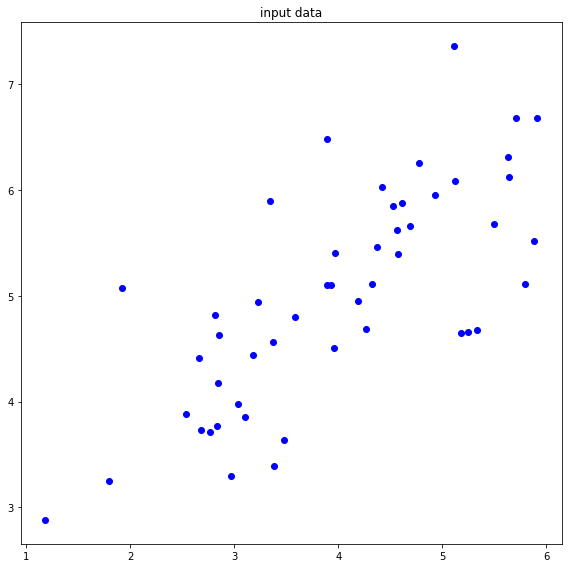

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, 'bo')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

In [7]:
mean_x = np.mean(x)
mean_y = np.mean(y)

std_x = np.std(x)
std_y = np.std(y)

feature[:, 0] = (x - mean_x) / std_x
feature[:, 1] = (y - mean_y) / std_y 

print("mean of x: ", mean_x)
print("mean of y: ", mean_y)
print("std of x: ", std_x)
print("std of y: ", std_y)

mean of x:  -1.509903313490213e-16
mean of y:  -4.840572387365683e-16
std of x:  0.9999999999999999
std of y:  0.9999999999999999


In [8]:
def plot_normalized_data(feature):
    
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    
    plt.plot(feature[:,0], feature[:,1], 'bo')

    plt.tight_layout()
    plt.show()

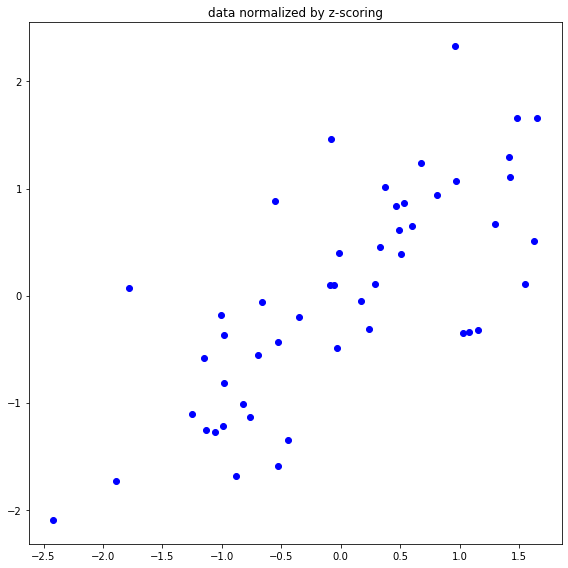

In [9]:
plot_normalized_data(feature)

## compute covariance matrix

In [10]:
def compute_covariance(feature):  

    Sigma = np.matmul(np.transpose(feature), feature) / number_data

    return Sigma

## compute principal directions

In [11]:
def compute_eigen(X):
    
    S, U = np.linalg.eig(X)
    
    return S, U

In [15]:
def plot_principal_directions(feature):

    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    plt.plot(x, y, 'bo')
    
    S, U = compute_eigen(compute_covariance(feature))
    scale = U * S
    first = scale[:,0]
    second = scale[:,1]

    plt.arrow(0, 0, first[0], first[1], width=0.02, head_width=0.07, head_length=0.2, color='red')
    plt.arrow(0, 0, second[0], second[1], width=0.02, head_width=0.07, head_length=0.2, color='green')

    plt.tight_layout()
    plt.show()

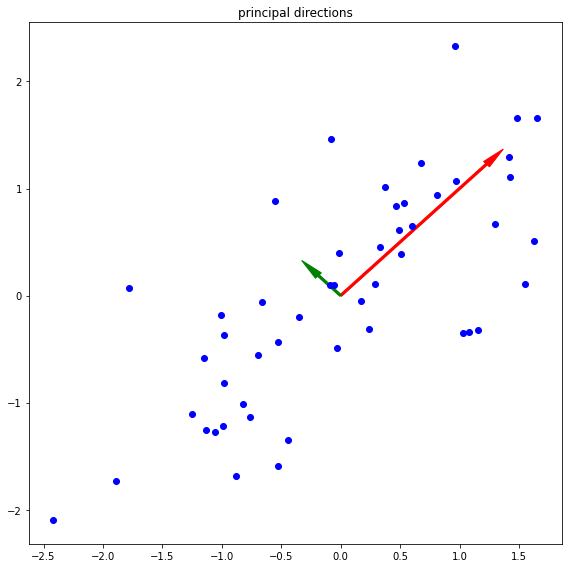

In [16]:
plot_principal_directions(feature)

## first principal axis

In [17]:
def plot_first_principal_axis(feature):
    
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    plt.plot(x, y, 'bo')
    
    S, U = compute_eigen(compute_covariance(feature))
    first = U[:,0]

    plt.axline((0,0), slope = first[1]/first[0], color = 'red')

    plt.tight_layout()
    plt.show()

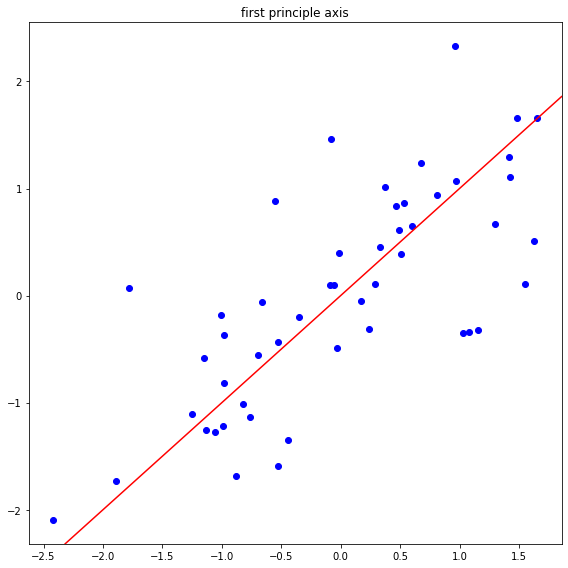

In [18]:
plot_first_principal_axis(feature)

## second principal axis

In [19]:
def plot_second_principal_axis(feature):
    
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    
    plt.plot(x, y, 'bo')
    
    S, U = compute_eigen(compute_covariance(feature))
    second = U[:,1]
    
    plt.axline((0,0), slope = second[1]/second[0], color = 'red')

    plt.tight_layout()
    plt.show()

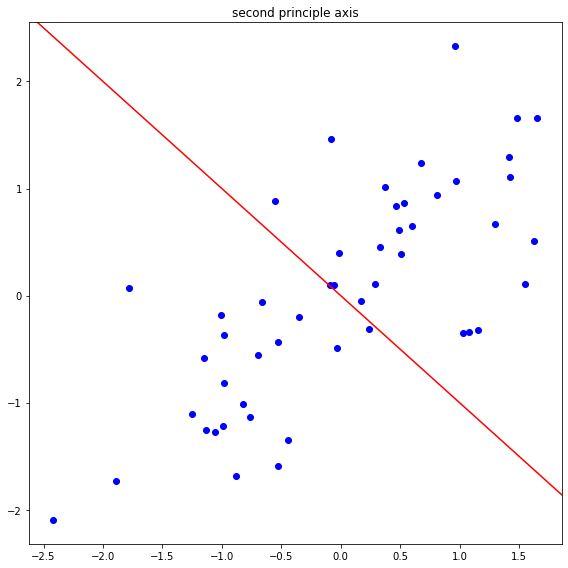

In [20]:
plot_second_principal_axis(feature)

## compute the projection of point onto the line

In [39]:
def compute_projection_onto_line(feature, vector):
    
    v_len = np.sqrt(np.sum(vector**2))
    dot = np.dot(feature, vector)
    scale = dot / v_len
    
    projection = []
    
    for i in range(number_data):
        projection.append(vector * scale[i])
        
    projection = np.array(projection)
    
    return projection

## projcet to the first principal axis

In [40]:
def plot_projection_first_principal_axis(feature):

    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    plt.plot(x, y, 'bo')

    S, U = compute_eigen(compute_covariance(feature))
    first = U[:,0]

    plt.axline((0,0), slope = first[1]/first[0], color = 'red')

    projection = compute_projection_onto_line(feature, first)
    plt.plot(projection[:, 0], projection[:,1], 'go')

    plt.tight_layout()
    plt.show()

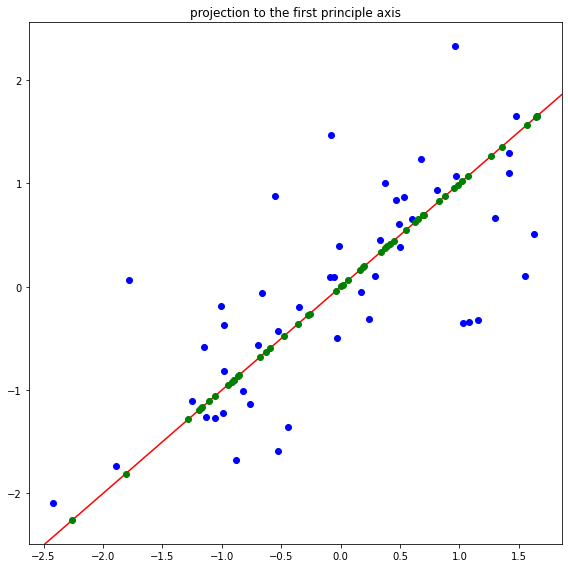

In [41]:
plot_projection_first_principal_axis(feature)

## projcet to the second principal axis

In [44]:
def plot_projection_second_principal_axis(feature):

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    plt.plot(x, y, 'bo')

    S, U = compute_eigen(compute_covariance(feature))
    second = U[:,1]

    plt.axline((0,0), slope = second[1]/second[0], color = 'red')

    projection = compute_projection_onto_line(feature, second)
    plt.plot(projection[:, 0], projection[:,1], 'go')

    plt.tight_layout()
    plt.show()

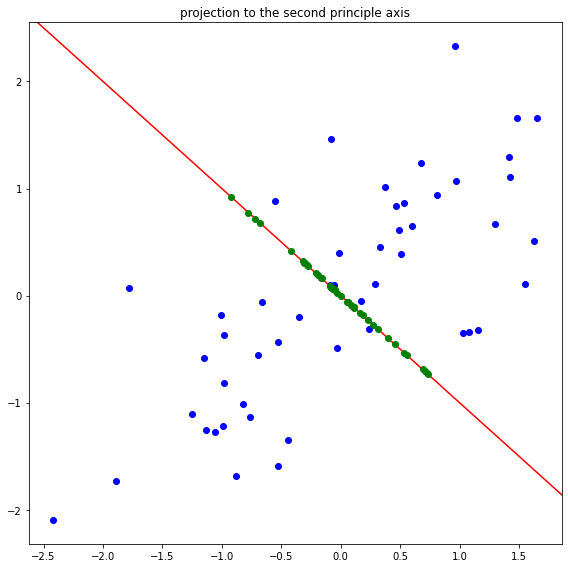

In [45]:
plot_projection_second_principal_axis(feature)

## connect original data to the projection onto the first principal axis

In [63]:
def plot_connection_first_principal_axis(feature):
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    plt.plot(x, y, 'bo')

    S, U = compute_eigen(compute_covariance(feature))
    first = U[:,0]

    plt.axline((0,0), slope = first[1]/first[0], color = 'red')
    
    projection = compute_projection_onto_line(feature, first)
    plt.plot(projection[:, 0], projection[:,1], 'go')

    for i in range(0, number_data):
        plt.plot([feature[i, 0], projection[i, 0]], [feature[i, 1], projection[i, 1]], color = 'gray')
    
    plt.tight_layout()
    plt.show()

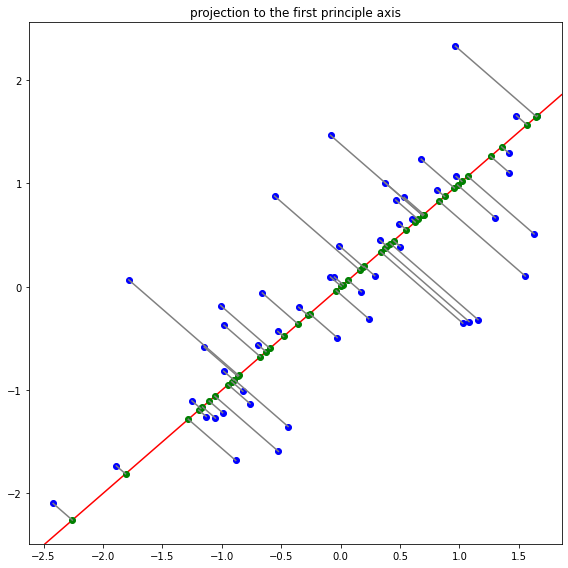

In [64]:
plot_connection_first_principal_axis(feature)

## connect original data to the projection onto the second principal axis

In [65]:
def plot_connection_second_principal_axis(feature):
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    plt.plot(x, y, 'bo')

    S, U = compute_eigen(compute_covariance(feature))
    second = U[:,1]

    plt.axline((0,0), slope = second[1]/second[0], color = 'red')
    
    projection = compute_projection_onto_line(feature, second)
    plt.plot(projection[:, 0], projection[:,1], 'go')

    for i in range(0, number_data):
        plt.plot([feature[i, 0], projection[i, 0]], [feature[i, 1], projection[i, 1]], color = 'gray')
    
    plt.tight_layout()
    plt.show()

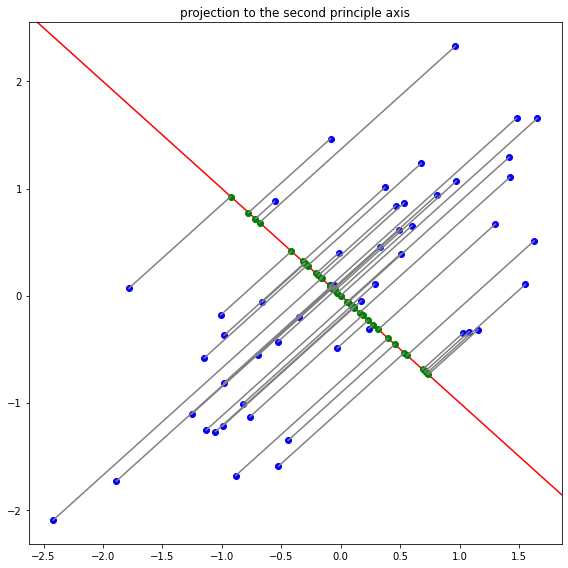

In [66]:
plot_connection_second_principal_axis(feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

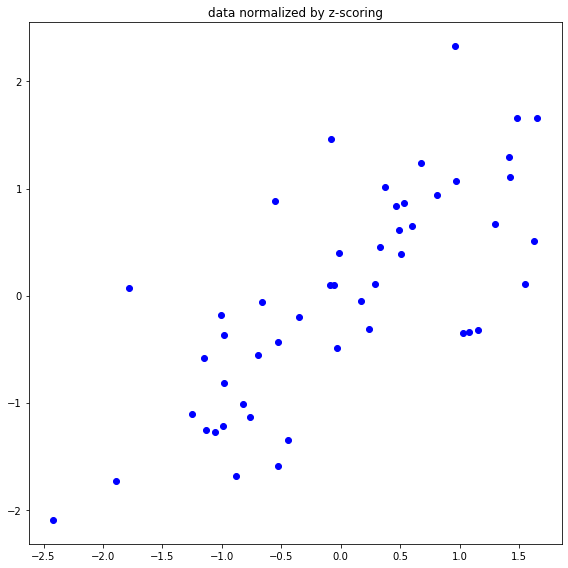

In [56]:
plot_normalized_data(feature)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

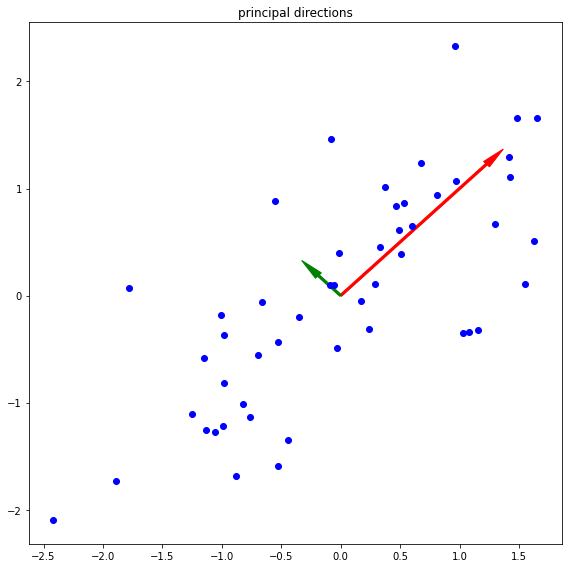

In [57]:
plot_principal_directions(feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

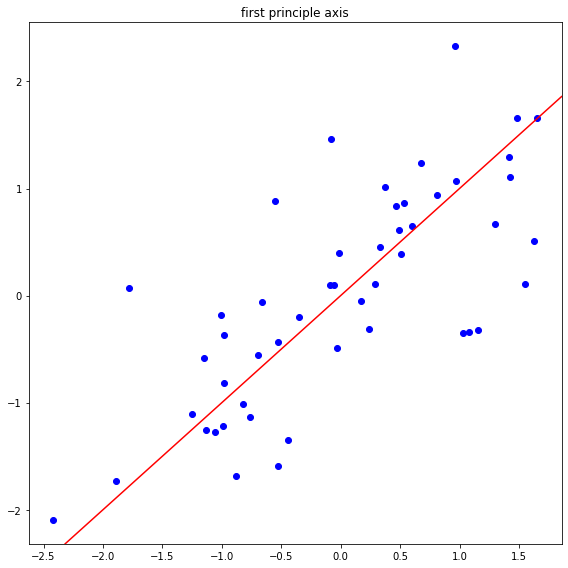

In [58]:
plot_first_principal_axis(feature)

***

### 4. plot the second principal axis in red on the normalized data in blue

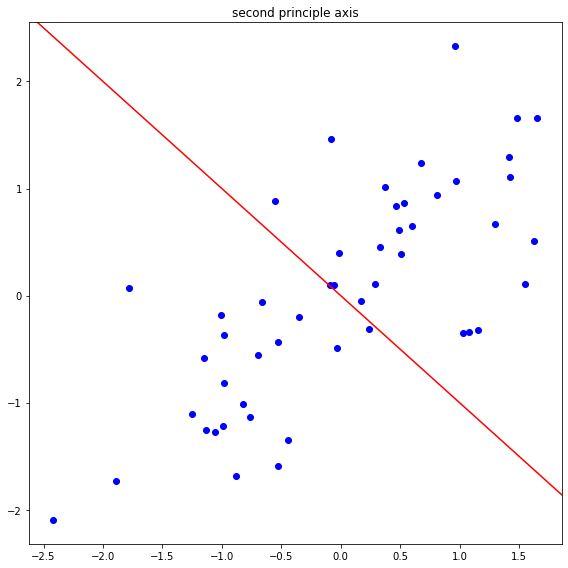

In [59]:
plot_second_principal_axis(feature)

***

### 5. plot the projection of data in green onto the first principal axis in red

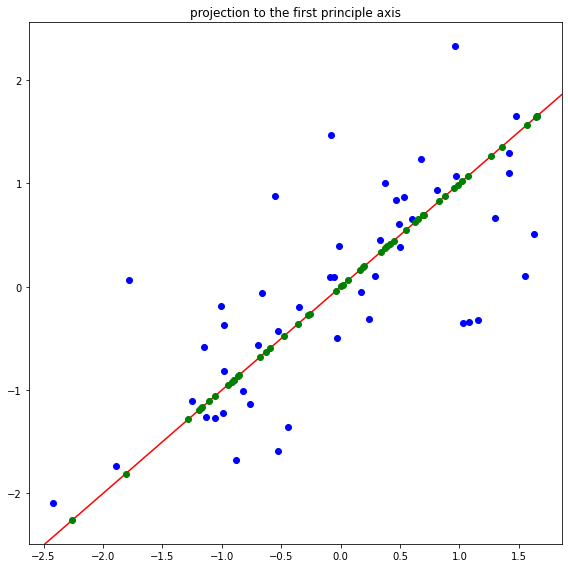

In [60]:
plot_projection_first_principal_axis(feature)

***

### 6. plot the projection of data in green onto the second principal axis in red

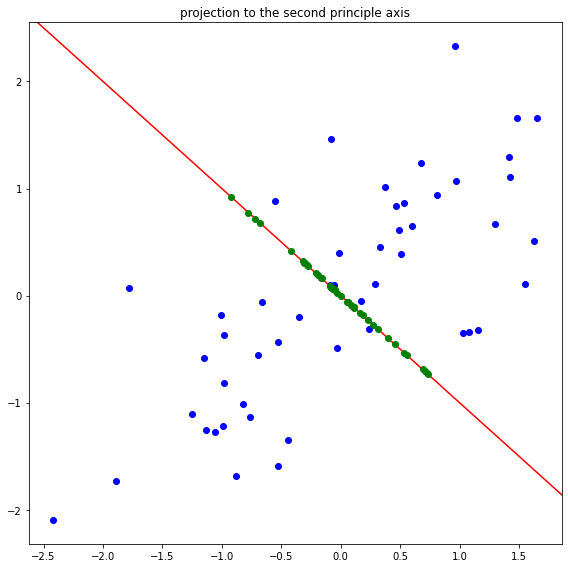

In [61]:
plot_projection_second_principal_axis(feature)

***

### 7. plot the projection line in grey onto the first principal axis

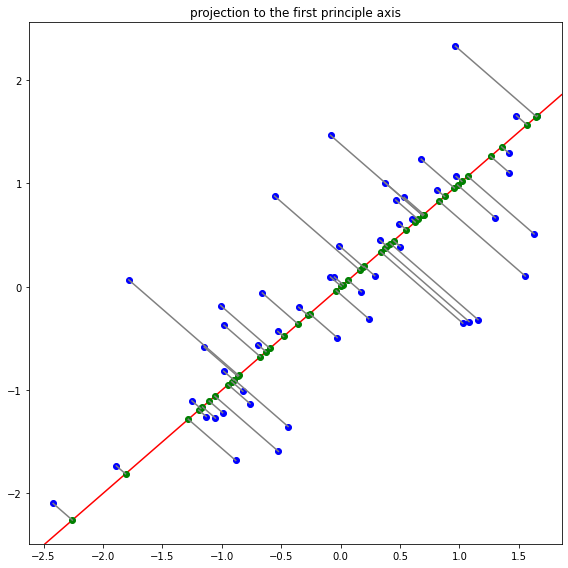

In [67]:
plot_connection_first_principal_axis(feature)

***

### 8. plot the projection line in grey onto the second principal axis

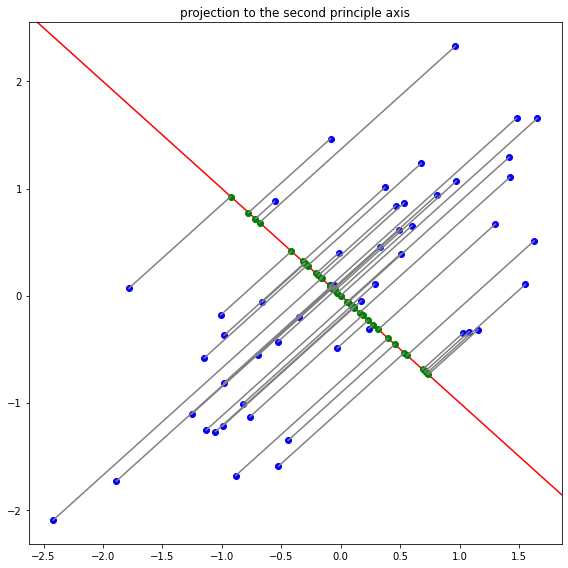

In [68]:
plot_connection_second_principal_axis(feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***